In [26]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport

In [2]:
artists = pd.read_csv('data_by_artist_o.csv')
data = pd.read_csv('data_o.csv')
tracks = pd.read_csv('tracks.csv')
genres = pd.read_csv('data_by_genres_o.csv')
by_year = pd.read_csv('data_by_year_o.csv')

In [35]:
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [41]:
tracks['release_date'] = pd.to_datetime(tracks.release_date)
tracks['year'] = tracks.release_date.dt.year

In [70]:
tracks.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
date                 0
year                 0
dtype: int64

In [72]:
tracks= tracks.dropna()

(586601, 22)


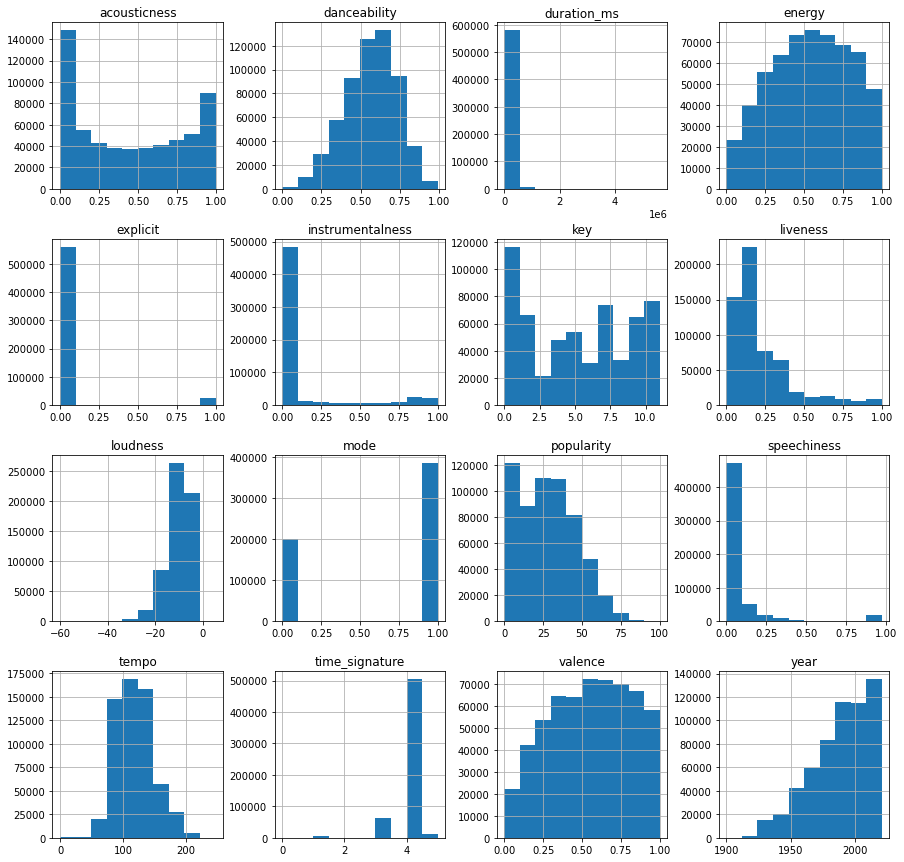

In [73]:
print(tracks.shape)
tracks.hist(figsize=(15, 15))
plt.show()

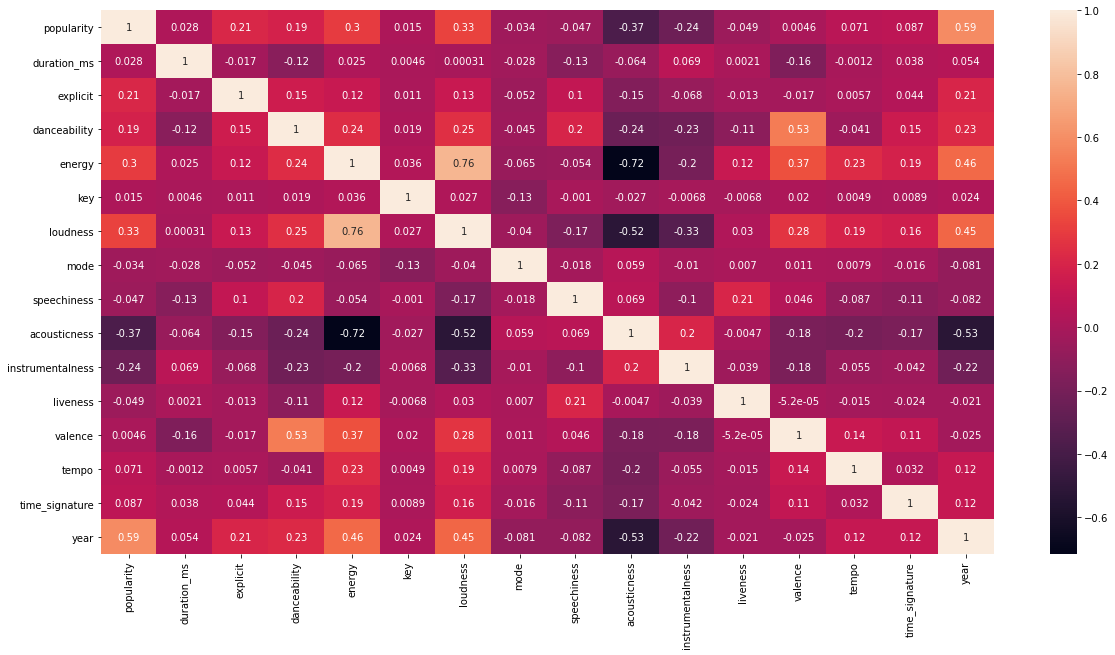

In [74]:
plt.figure(figsize=(20, 10))
sns.heatmap(tracks.corr(), annot=True)

C:\Users\batka\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


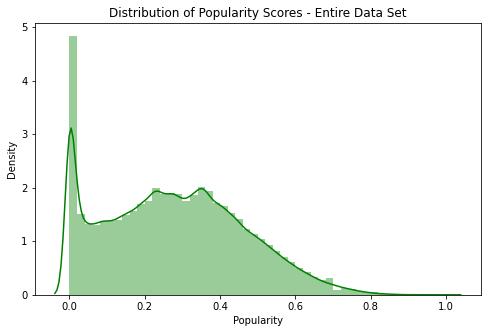

In [5]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
sns.distplot(tracks['popularity']/100, color='g', label="Popularity").set_title("Distribution of Popularity Scores - Entire Data Set")
plt.xlabel("Popularity")
plt.ylabel("Density")

plt.show()

In [6]:
def get_stats(df):
    # print stats for various metrics
    print(f"There are {df.shape[0]} rows")
    print(f"There are {df['id'].unique().shape} unique songs")
    print(f"There are {df['artists'].unique().shape} unique artists")
    print(f"There are {df['popularity'].unique().shape} popularity scores")
    print(f"The mean popularity score is {df['popularity'].mean()}")
    print(f"There are {df[df['popularity'] > 55]['popularity'].count()} songs with a popularity score > 55")
    print(f"There are {df[df['popularity'] > 75]['popularity'].count()} songs with a popularity score > 75")
    print(f"Only {(df[df['popularity'] > 80]['popularity'].count() / df.shape[0])*100:.2f} % of songs have a popularity score > 80")


In [7]:
get_stats(tracks)

There are 586672 rows
There are (586672,) unique songs
There are (114030,) unique artists
There are (101,) popularity scores
The mean popularity score is 27.570052772247525
There are 43178 songs with a popularity score > 55
There are 2423 songs with a popularity score > 75
Only 0.13 % of songs have a popularity score > 80


In [12]:
def most_popular_songs(df):
    most_popular = df[df['popularity'] > 90]['popularity'].count()
    print(df[df['popularity'] > 90][['name', 'popularity']])

In [13]:
most_popular_songs(tracks)

                                                    name  popularity
91866                                            Streets          94
91867                                   Watermelon Sugar          92
92810                                    Save Your Tears          97
92811                                          telepatía          97
92813                                    Blinding Lights          96
92814                                       The Business          95
92816                             Heartbreak Anniversary          94
92817                                        WITHOUT YOU          94
92819                                            Bandido          94
92821                                 LA NOCHE DE ANOCHE          93
92823                                          Good Days          93
92824                                             DÁKITI          92
92826                                          positions          92
92827                             

In [22]:
popular_songs = tracks.groupby(tracks['popularity']>=50)['artists','popularity'].count()
popular_songs.head()

<ipython-input-22-56cb3dba7541>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  popular_songs = tracks.groupby(tracks['popularity']>=50)['artists','popularity'].count()


,artists,popularity
popularity,,
False,510829,510829
True,75843,75843


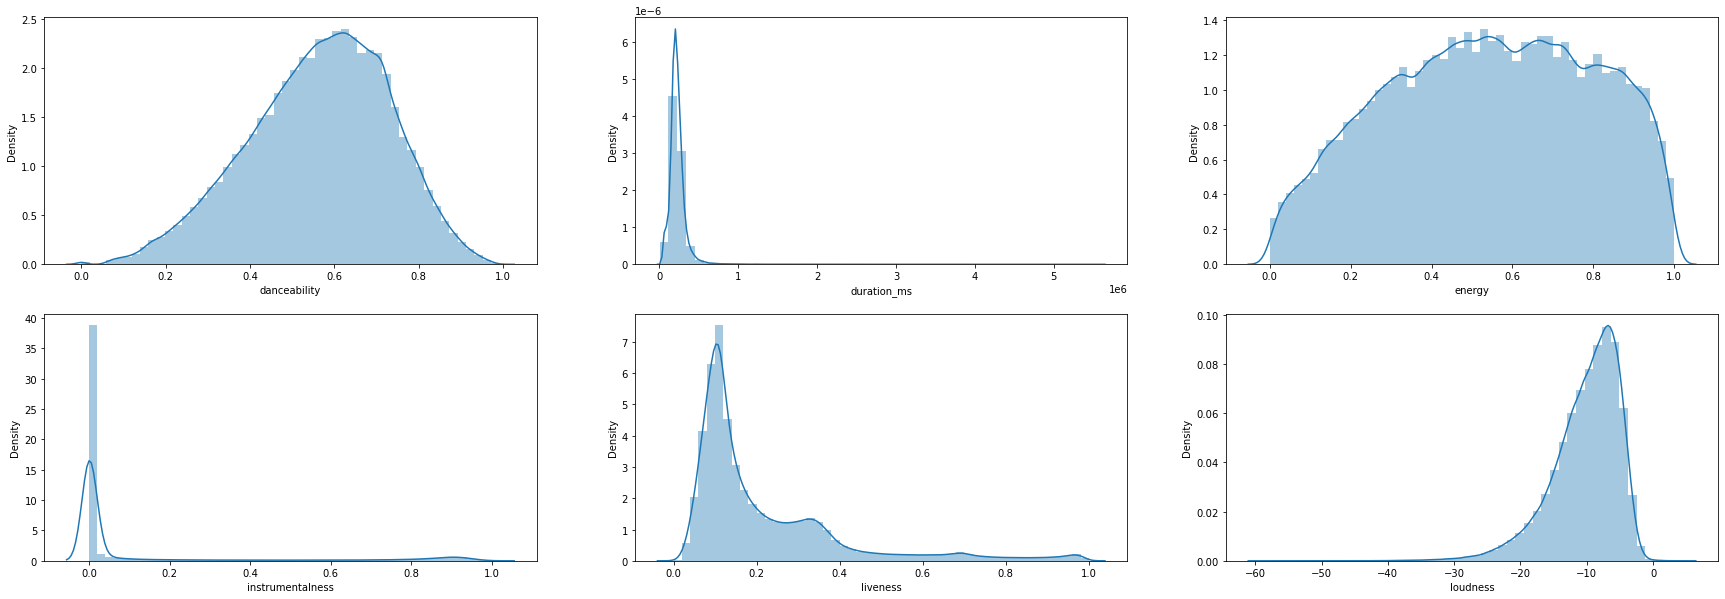

In [27]:
plt.figure(figsize = (30, 10))
plt.subplot(231)
sns.distplot(tracks['danceability'])
plt.subplot(232)
sns.distplot(tracks['duration_ms'])
plt.subplot(233)
sns.distplot(tracks['energy'])
plt.subplot(234)
sns.distplot(tracks['instrumentalness'])
plt.subplot(235)
sns.distplot(tracks['liveness'])
plt.subplot(236)
sns.distplot(tracks['loudness'])
plt.show()

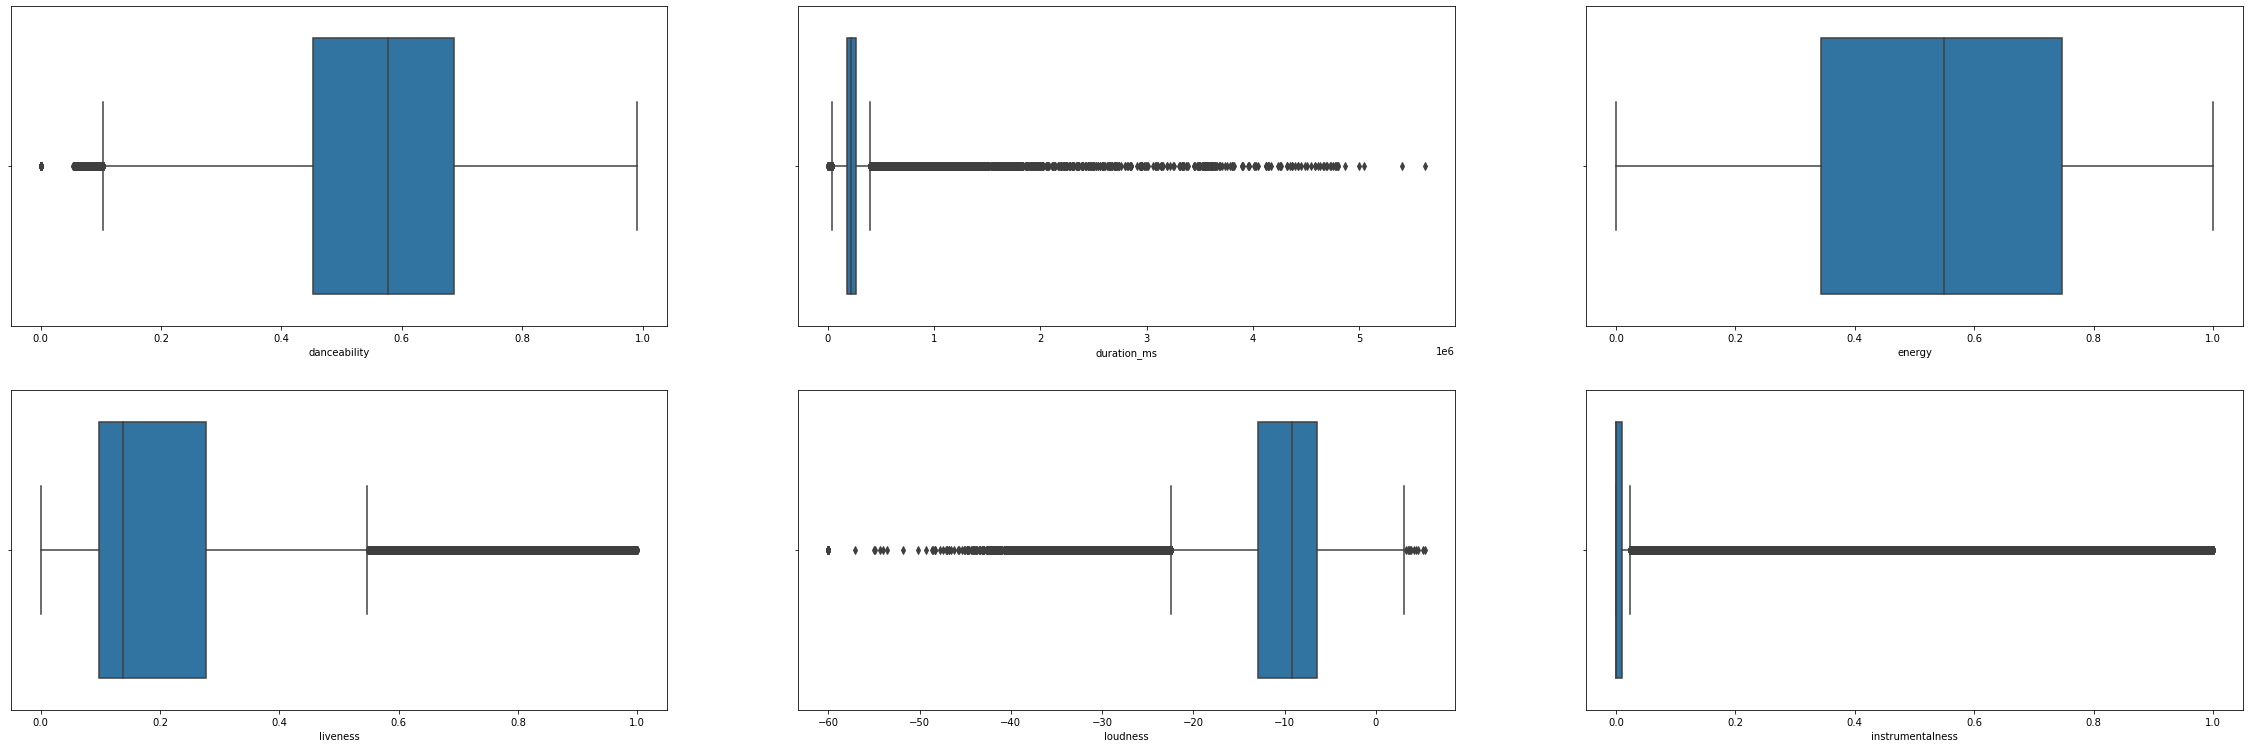

In [28]:
plt.figure(figsize = (40, 20))
plt.subplot(331)
sns.boxplot(tracks['danceability'])
plt.subplot(332)
sns.boxplot(tracks['duration_ms'])
plt.subplot(333)
sns.boxplot(tracks['energy'])
plt.subplot(334)
sns.boxplot(tracks['liveness'])
plt.subplot(335)
sns.boxplot(tracks['loudness'])
plt.subplot(336)
sns.boxplot(tracks['instrumentalness'])
plt.show()

In [44]:
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,date,year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,1922-02-22,1922
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,1922-06-01,1922
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,1922-03-21,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,1922-03-21,1922
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.1580,...,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,1922-01-01,1922


In [42]:
groups = tracks[tracks['year']>=1950].groupby(['year']).mean()

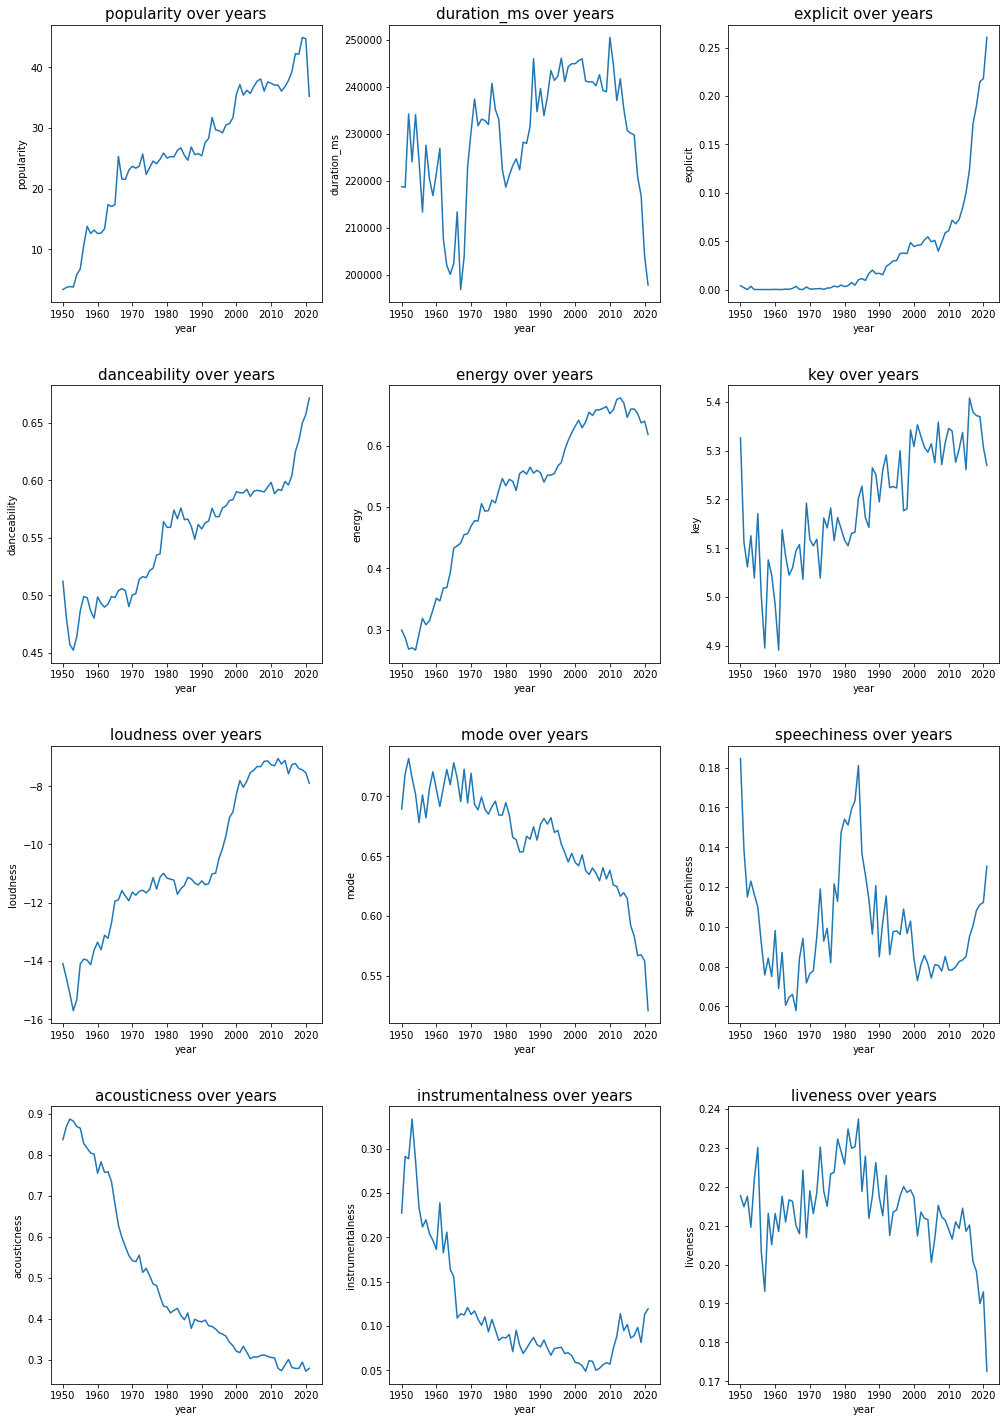

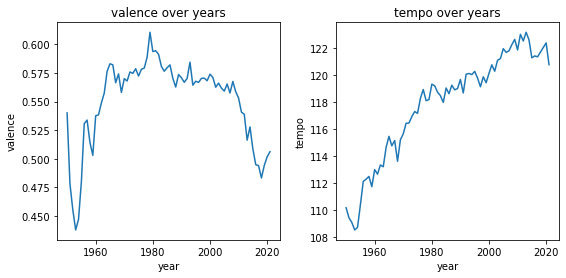

In [43]:

fig, axes1 = plt.subplots(4, 3, figsize=(17, 25))
plt.subplots_adjust(hspace=0.3, wspace=0.25)
fig, axes2 = plt.subplots(1, 2, figsize=(9, 4))
plt.subplots_adjust(wspace=0.25)

for row in axes1:
    for ax in row:
        col = groups.columns[list(axes1.flatten()).index(ax)]
        ax.plot(groups.index, groups[col])
        ax.set_title(col + ' over years', size=15)
        ax.set_xlabel('year')
        ax.set_ylabel(col)
        
for ax in axes2:
    col = groups.columns[list(axes2.flatten()).index(ax)+12]
    ax.plot(groups.index, groups[col])
    ax.set_title(col + ' over years', size=12)
    ax.set_xlabel('year')
    ax.set_ylabel(col)

plt.show()

In [47]:
popularity= tracks.copy().sort_values(by=['popularity'],ascending=False)[['popularity','name','artists']][0:100]

In [48]:
popularity

,popularity,name,artists
93802,100,Peaches (feat. Daniel Caesar & Giveon),"['Justin Bieber', 'Daniel Caesar', 'Giveon']"
93803,99,drivers license,['Olivia Rodrigo']
93804,98,Astronaut In The Ocean,['Masked Wolf']
92810,97,Save Your Tears,['The Weeknd']
92811,97,telepatía,['Kali Uchis']
...,...,...,...
92887,87,UN DIA (ONE DAY) (Feat. Tainy),"['J Balvin', 'Tainy', 'Dua Lipa', 'Bad Bunny']"
91891,87,everything i wanted,['Billie Eilish']
88940,87,Say You Won't Let Go,['James Arthur']
88939,87,Train Wreck,['James Arthur']


In [49]:
tracks_popular = tracks[tracks.popularity > 90]
tracks_popular.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,date,year
91866,60ynsPSSKe6O3sfwRnIBRf,Streets,94,226987,1,['Doja Cat'],['5cj0lLjcoR7YOSnhnX0Po5'],2019-11-07,0.749,0.463,...,1,0.0828,0.20800,0.037100,0.3370,0.190,90.028,4,2019-11-07,2019
91867,6UelLqGlWMcVH1E5c4H7lY,Watermelon Sugar,92,174000,0,['Harry Styles'],['6KImCVD70vtIoJWnq6nGn3'],2019-12-13,0.548,0.816,...,1,0.0465,0.12200,0.000000,0.3350,0.557,95.390,4,2019-12-13,2019
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,...,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4,2020-03-20,2020
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,...,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4,2020-12-04,2020
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,...,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4,2020-03-20,2020


In [68]:
popular_artists = tracks.groupby("artists").agg({"popularity":"sum"}).sort_values(by= 'popularity', ascending=False).reset_index()

In [75]:
top20 = popular_artists.head(20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

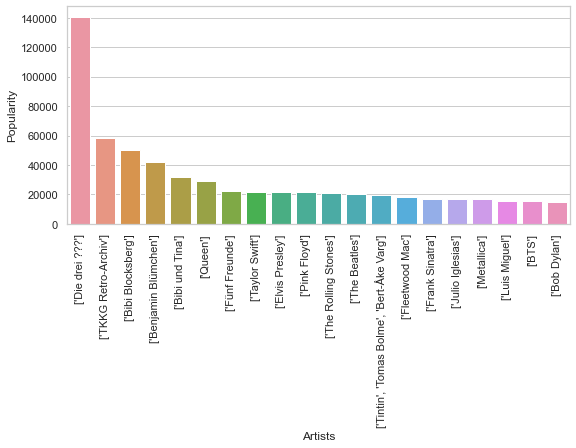

In [78]:
plt.figure(figsize=(9, 4))
sns.set(style="whitegrid")
ax = sns.barplot(x='artists', y = 'popularity', data = top20)
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)

In [79]:
more_songs = tracks.artists.value_counts()
more_songs.head()

['Die drei ???']         3856
['TKKG Retro-Archiv']    2006
['Benjamin Blümchen']    1503
['Bibi Blocksberg']      1472
['Lata Mangeshkar']      1373
Name: artists, dtype: int64